# Cifar-100 이미지 분류

### 0.48179998993873596

In [1]:
import numpy as np 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

상수 설정

In [2]:
BATCH_SIZE = 50
NUM_CLASSES = 100
EPOCHS = 100
DATA_AUGMENTATION = True
NUM_PREDICTIONS = 20
MODEL_PATH = 'best_cifar-100.h5'

# 추가 옵션
img_width, img_height, img_num_channels = 32, 32, 3

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 5s 0us/step


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
input_shape = (img_width, img_height, img_num_channels)

In [6]:
# 0과 1 사이 값으로 정규화
X_train = X_train / 255.0
X_test = X_test /255.0

In [7]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

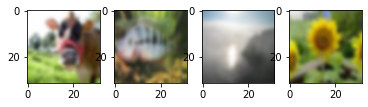

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.show()

In [9]:
class_names = [ 'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']

class_names[y_train[0][0]], class_names[y_train[4][0]], \
    class_names[y_train[8][0]], class_names[y_train[12][0]]

('cattle', 'aquarium_fish', 'cloud', 'sunflower')

## 모델 정의, 설정, 실행, 평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D , Dropout  # 모델 정의시
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # 모델 학습시, collback

In [11]:
# 모델 생성 
model = Sequential([
    Conv2D(32,(3,3), padding = 'same', input_shape = (32,32,3), activation='relu'), # input_shape: Xsize때문 (32*32), color라서 3
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64,(3,3), padding = 'same', activation='relu'), # input_shape: Xsize때문 (32*32), color라서 3
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [12]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.0001, decay = 1e-6)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
checkpoint = ModelCheckpoint(MODEL_PATH, verbose=1, save_best_only=True)  #callbacks 설정
early_stopping = EarlyStopping(patience=10) #callbacks 설정

In [14]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
800/800 [==============================] - 38s 8ms/step - loss: 4.4874 - accuracy: 0.0211 - val_loss: 4.3096 - val_accuracy: 0.0410

Epoch 00001: val_loss improved from inf to 4.30955, saving model to best_cifar-100.h5
Epoch 2/100
800/800 [==============================] - 6s 7ms/step - loss: 4.2508 - accuracy: 0.0419 - val_loss: 4.0975 - val_accuracy: 0.0724

Epoch 00002: val_loss improved from 4.30955 to 4.09747, saving model to best_cifar-100.h5
Epoch 3/100
800/800 [==============================] - 6s 7ms/step - loss: 4.0703 - accuracy: 0.0694 - val_loss: 3.9181 - val_accuracy: 0.1080

Epoch 00003: val_loss improved from 4.09747 to 3.91807, saving model to best_cifar-100.h5
Epoch 4/100
800/800 [==============================] - 6s 7ms/step - loss: 3.9247 - accuracy: 0.0934 - val_loss: 3.7860 - val_accuracy: 0.1246

Epoch 00004: val_loss improved from 3.91807 to 3.78598, saving model to best_cifar-100.h5
Epoch 5/100
800/800 [==============================] - 6s 7ms/step 

In [16]:
from tensorflow.keras.models import load_model
best_model = load_model(MODEL_PATH )
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.9804 - accuracy: 0.4818


[1.9804490804672241, 0.48179998993873596]